In [1]:
using BenchmarkTools
using Plots

include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

In [ ]:
k = 10 .^(range(-4,stop=3,length=5000))

plot(k, abs.(cj.transfer_function.(k, with_baryons=true)), yscale=:log10, xscale=:log10)
plot!(k, abs.(cj.transfer_function.(k, with_baryons=false)), yscale=:log10, xscale=:log10)

In [26]:
k = 10 .^(range(7,stop=3,length=5000))

trivial_cosmo = cj.Cosmology(cj.planck18_bkg, k->cj.power_spectrum_ΛCDM(k), cj.TrivialTF)

plot(k,  cj.matter_power_spectrum.(k), yscale=:log10, xscale=:log10)
plot!(k, cj.matter_power_spectrum.(k, cosmology = trivial_cosmo), yscale=:log10, xscale=:log10)
plot!(k, cj.curvature_power_spectrum.(k), yscale=:log10, xscale=:log10)

MethodError: MethodError: no method matching Main.Cosmojuly.PowerSpectrum.Cosmology(::Main.Cosmojuly.BackgroundCosmo.FlatFLRW{Float64}, ::var"#9#10", ::Type{Main.Cosmojuly.TransferFunction.TrivialTF})
Closest candidates are:
  Main.Cosmojuly.PowerSpectrum.Cosmology(::Any, ::Any, ::Any, !Matched::Any) at ~/Documents/work/codes/env_DarkUniverse/Cosmojuly.jl/src/PowerSpectrum.jl:26

In [37]:
m = 10 .^(range(7,stop=16,length=500))
#plot(m, cj.σ_vs_M.(m, cj.SharpK), xscale=:log10)
plot(m, cj.σ_vs_M.(m, cj.TopHat) * 0.8101999759674072 / 0.8306880026086692, xscale=:log10)
#plot!(m, cj.σ_vs_M.(m, cj.Gaussian), xscale=:log10)

#println(cj.σ(8 / 0.6766, cj.TopHat))
println(cj.growth_factor(0))

0.7871200975145634


0.975336074943996

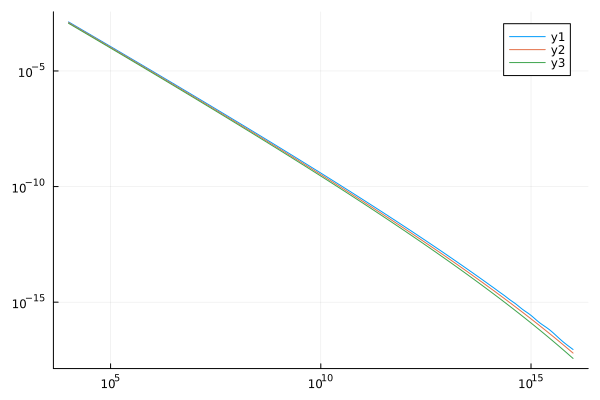

In [38]:
m = 10 .^(range(4,stop=16,length=500))
plot(m, abs.(cj.dσ²_dM.(m, cj.SharpK)), xscale=:log10, yscale=:log10)
plot!(m, abs.(cj.dσ²_dM.(m, cj.TopHat)), xscale=:log10, yscale=:log10)
plot!(m, abs.(cj.dσ²_dM.(m, cj.Gaussian)), xscale=:log10, yscale=:log10)

In [ ]:
m = 10 .^(range(-12,stop=15,length=500))
plot(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.TopHat, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.Gaussian, cj.PressSchechter), xscale=:log10, yscale=:log10)

plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.SethTormen), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.TopHat, cj.SethTormen), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.Gaussian, cj.SethTormen), xscale=:log10, yscale=:log10)

[1.1099130510779403e-12, 7.305536890087176e-13, 4.787452222660558e-13, 3.123480694729803e-13, 2.0286966399334096e-13, 1.3115899269681202e-13, 8.439757351955192e-14, 5.4047116763255284e-14, 3.4502307425390485e-14, 2.1893625191977647e-14, 1.38192504439977e-14, 8.644978701947424e-15, 5.4048601320121996e-15, 3.3489438479907433e-15, 2.0629423234311394e-15, 1.2632288244869472e-15, 7.689826685275545e-16, 4.654044881866174e-16, 2.800716745551229e-16, 1.6912016336064833e-16, 1.0059526476511175e-16, 5.943489285962415e-17, 3.454551944478881e-17, 2.0115411493456904e-17, 1.1760756514737719e-17, 6.756334566825986e-18, 3.85229223716069e-18, 2.179360113625515e-18, 1.2230262650482377e-18, 6.807426711781088e-19, 3.7580719090131083e-19, 2.057461271322617e-19, 1.10683332114697e-19, 5.95912162463458e-20, 3.180845503857918e-20, 1.6831748450663615e-20, 8.827186241140056e-21, 4.5870326776102494e-21, 2.3613230286732786e-21, 1.1900403566166404e-21, 5.971970297815223e-22, 2.964688259007468e-22, 1.454298604451152

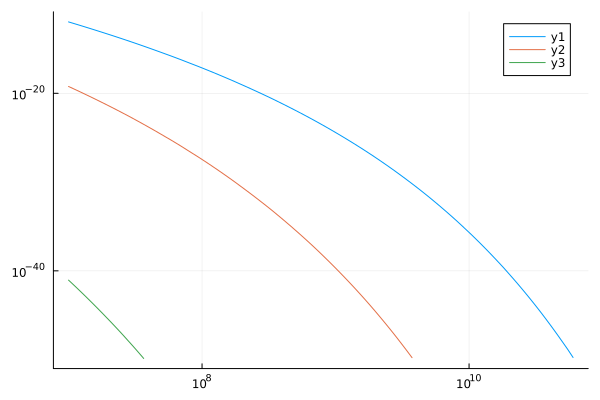

In [23]:
m = 10 .^(range(7, stop=15,length=200))

res1 =  cj.dn_dM.(m, 25, cj.TopHat, cj.PressSchechter)
res2 =  cj.dn_dM.(m, 35, cj.TopHat, cj.PressSchechter)
res3 =  cj.dn_dM.(m, 55, cj.TopHat, cj.PressSchechter)

println(res1[res1 .> 1e-50])
println(res2[res2 .> 1e-50])
println(res3[res3 .> 1e-50])

plot(m[res1 .> 1e-50], res1[res1 .> 1e-50], xscale=:log10, yscale=:log10)
plot!(m[res2 .> 1e-50], res2[res2 .> 1e-50], xscale=:log10, yscale=:log10)
plot!(m[res3 .> 1e-50], res3[res3 .> 1e-50], xscale=:log10, yscale=:log10)